In [1]:
import os
import sys

import h5py 
import pandas as pd
import numpy as np
import random

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from matplotlib.collections import LineCollection

import time
import json
from joblib import Parallel, delayed

In [2]:
from pomegranate import *


In [3]:
tsne_folder = '../Results/20201027-103250_tsne_14files_18feats/'
tsne_output = os.path.join(tsne_folder, 'tsne_out_array_path_p50_n20000.npy')
X_tsne = np.load(tsne_output)

In [4]:
## We use the mapping to the wavelet-datafolder to get the labels (experiments)
with open(os.path.join(tsne_folder, 'tsne_metadata.txt'), 'r') as outfile:
    tsne_settings = json.load(outfile)

wv_norm_array_path = tsne_settings['wv_norm_array_path']
wv_norm_array = np.load(wv_norm_array_path)

## To get the files/experiments to which each datapoint in tsne output belong to. 
y_ciona = wv_norm_array[:, -1]

In [26]:
tsne_settings

{'perplexity': 50,
 'n_iter': 20000,
 'n_iter_without_progress': 100,
 'n_samples': 125034,
 'n_features': 540,
 'wv_norm_array_path': '../Results/20201026-105643_wv_14files_18feats/wv_norm_array.npy',
 'tsne_out_array_path': '../Results/20201027-103250_tsne_14files_18feats/tsne_out_array_path_p50_n20000.npy'}

In [5]:
wv_norm_array[:, :-1].shape

(125034, 540)

In [6]:
c_pal = sns.color_palette("tab20", 20)
ciona_colors = [c_pal[int(i)] for i in y_ciona]

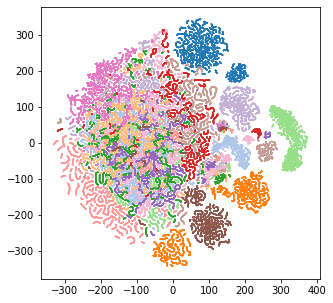

In [7]:
fig, axes = plt.subplots(1,1, figsize=(20,5))

axes.scatter(X_tsne[:,0],X_tsne[:,1], c = ciona_colors, s=0.1)
axes.set_aspect('equal')


# t_axis = np.arange(0, X_tsne.shape[0])
# # axes[1].plot(t_axis,X_tsne[:,0], c='r')
# axes[1].plot(t_axis,X_tsne[:,0], c='b')
# axes[2].plot(t_axis,X_tsne[:,1], c='r')

In [ ]:
# from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


# from matplotlib.ticker import LinearLocator, FormatStrFormatter



# fig = plt.figure()
# ax = fig.gca(projection='3d')

# # # Make data.
# # X = np.arange(-5, 5, 0.25)
# # Y = np.arange(-5, 5, 0.25)
# # X, Y = np.meshgrid(X, Y)
# # R = np.sqrt(X**2 + Y**2)
# # Z = np.sin(R)

# Z = wv_norm_array[:, :-1]

# # Plot the surface.
# surf = ax.plot_surface(X_tsne[:,0], X_tsne[:,1], Z, cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False)

# # Customize the z axis.
# # ax.set_zlim(-1.01, 1.01)
# ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# # Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)


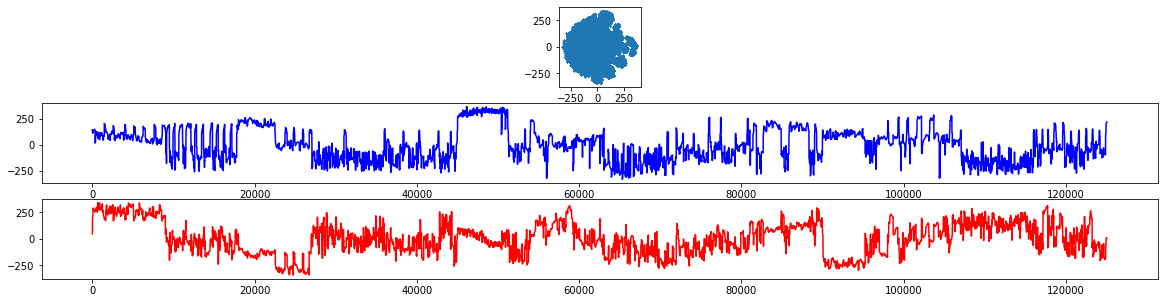

In [8]:
fig, axes = plt.subplots(3,1, figsize=(20,5))

axes[0].scatter(X_tsne[:,0],X_tsne[:,1], s=0.1)
axes[0].set_aspect('equal')


t_axis = np.arange(0, X_tsne.shape[0])
# axes[1].plot(t_axis,X_tsne[:,0], c='r')
axes[1].plot(t_axis,X_tsne[:,0], c='b')
axes[2].plot(t_axis,X_tsne[:,1], c='r')


In [9]:
xy = X_tsne

In [10]:
end_points = np.where(np.diff(y_ciona))
end_points[0]

array([  9001,  18003,  27003,  36005,  45008,  54008,  63009,  72011,
        81012,  90014,  98027, 107028, 116030])

In [11]:
end_points = np.concatenate(([0],end_points[0],[xy.shape[0]-1]))
end_points

array([     0,   9001,  18003,  27003,  36005,  45008,  54008,  63009,
        72011,  81012,  90014,  98027, 107028, 116030, 125033])

In [12]:
segments = [xy[i:j,:] for i,j in zip(end_points[:-1],end_points[1:])]
print(len(segments[0]))

9001


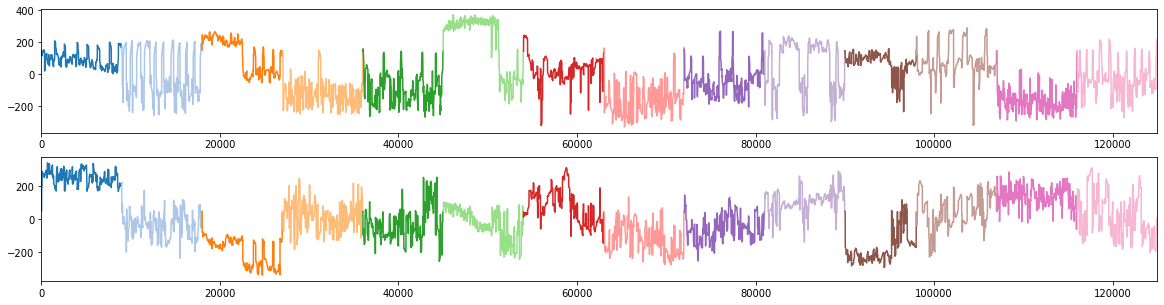

In [13]:
fig, axes = plt.subplots(2,1,figsize=(20,5))
for ax in axes:
    ax.set_xlim([0,end_points[-1]])

for i, mn in enumerate(zip(end_points[:-1],end_points[1:])):
    start = mn[0]
    end = mn[1]
    t_axis = np.arange(start,end) 
    segments_z1 = xy[start:end,0]
    segments_z2 = xy[start:end,1]
    axes[0].plot(t_axis, segments_z1, c = c_pal[i])
    axes[1].plot(t_axis, segments_z2, c = c_pal[i])
    

In [14]:
end_points

array([     0,   9001,  18003,  27003,  36005,  45008,  54008,  63009,
        72011,  81012,  90014,  98027, 107028, 116030, 125033])

In [28]:
wv_norm_array.shape

(125034, 541)

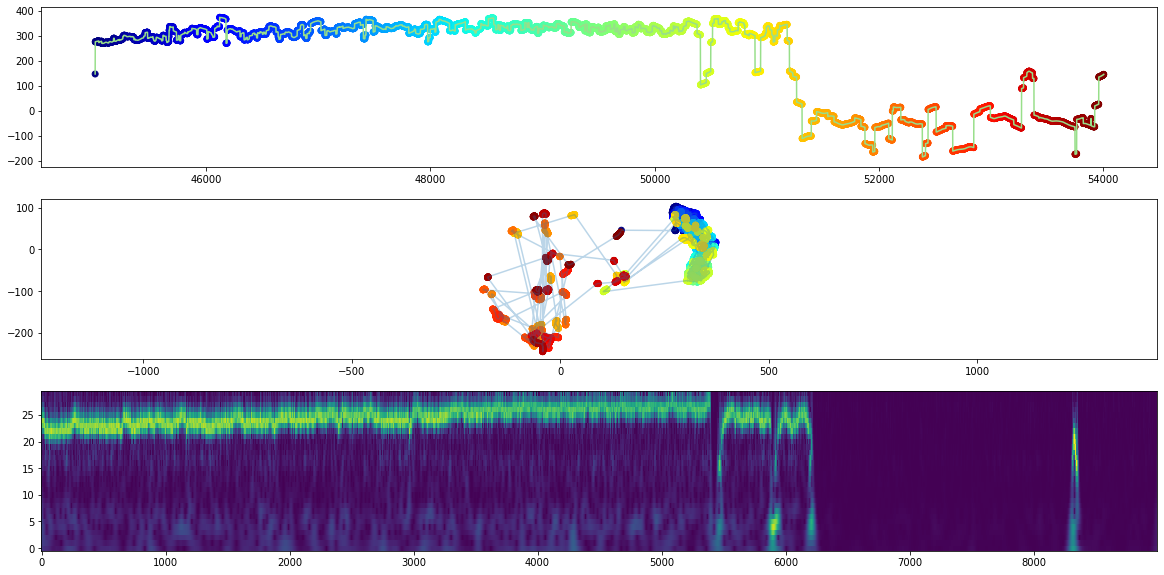

In [31]:
fig, axes = plt.subplots(3, 1,figsize=(20,10))

# for i, mn in enumerate(zip(end_points[:-1],end_points[1:])):

i = 5
start = end_points[i]
end = end_points[i+1]
t_axis = np.arange(start,end) 
segments_z1 = xy[start:end,0]
segments_z2 = xy[start:end,1]
axes[0].plot(t_axis, segments_z1, c = c_pal[i])
axes[0].scatter(t_axis, segments_z1, c = t_axis, cmap = cm.jet)
axes[1].scatter(segments_z1, segments_z2,  c= t_axis, cmap = cm.jet )
axes[1].plot(segments_z1, segments_z2, alpha = 0.3)
axes[1].axis('equal')
axes[2].imshow(wv_norm_array[start:end, 0:30].T, origin = 'lower', aspect='auto')

### The velocities 

In [ ]:
vel_z1 = np.diff()
vel_z2 = 

In [ ]:
fig, axes = plt.subplots(3,1,figsize=(20,5))
for ax in axes:
    ax.set_xlim([0,end_points[-1]])

vel_list = []
for i, mn in enumerate(zip(end_points[:-1],end_points[1:])):
    start = mn[0]
    end = mn[1]
    t_axis = np.arange(start,end-1) 
    segments_z1 = xy[start:end,0]
    segments_z2 = xy[start:end,1]

    vel_z1 = np.diff(segments_z1)
    vel_z2 = np.diff(segments_z2)
    
    vel_z = np.sqrt(vel_z1**2 + vel_z2**2)
#     vel_z = np.concatenate([vel_z, [vel_z[-1]]])
    
    axes[0].plot(t_axis, vel_z1, c = c_pal[i])
    axes[1].plot(t_axis, vel_z2, c = c_pal[i])
    axes[2].plot(t_axis, vel_z, c = c_pal[i])
    
    vel_list.append(vel_z)
    
    

In [ ]:
from pomegranate import *

x = np.concatenate(vel_list).reshape(-1, 1)

model = GeneralMixtureModel.from_samples(LogNormalDistribution, n_components=2, X=x)
model.fit(x)
pomegranate_clusters = model.predict(x)

In [ ]:
model

In [ ]:
mu1 = model.distributions[0].parameters[0]
sigma1 = model.distributions[0].parameters[1]
mu2 = model.distributions[1].parameters[0]
sigma2 = model.distributions[1].parameters[1]

In [ ]:
s1 = np.random.lognormal(mu1, sigma1, 1000)
s2 = np.random.lognormal(mu2, sigma2, 1000)

In [ ]:
from scipy import stats

plt.hist(x, bins=50, normed=True, color='c', alpha=0.75)
xmin = x.min()
xmax = x.max()
x = np.linspace(xmin, xmax, 100)
pdf = stats.lognorm.pdf(x, s1, scale =1)
plt.plot(x, pdf, 'k')